In [ ]:
import os
import pandas as pd
import re
from google.cloud import translate_v2 as translate

In [ ]:
###Integrate Google translate API keys
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/content/sample_data/languagetranslationmodel-3c3fa8b4985c.json"

In [ ]:
###Load data
new_data = "/content/sample_data/reddit_data.csv"
df = pd.read_csv(new_data)
df = df[["title", "subreddit"]]
df.columns = ["subreddit", "post"]
df.head()

In [16]:
###Data cleaning techniques

#  - Converted all data into lower case
#  - remove non-alphabetic characters and convert to lowercase
#  -  # remove extra whitespace

In [ ]:
#convert data frame to lower case
def col_lower(cols, df):
    posts = []
    for i in df[cols].values:
        post_data = i.lower()
        posts.append(post_data)
    df[cols] = posts
    return df
data_df = col_lower(cols="post", df=df)
data_df = col_lower(cols="subreddit", df=df)
data_df.head()

In [ ]:
##Deal with non-numeric texts
def clean_text(text):
    # remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()
    return text

data_df['subreddit'] = data_df['subreddit'].apply(clean_text)
data_df['post'] = data_df['post'].apply(clean_text)

data_df.head()

In [ ]:
###Translate post from english to french using google cloud translate

In [ ]:
#### English post to french
data_post = []
for i in range(0, data_df.shape[0]):
  translate_client = translate.Client() 
  text = data_df["post"].values[i]
  target = "fr"
  result = translate_client.translate(
      text,
      target_language='fr'
  )
  convert = result["translatedText"]
  data_post.append(convert)

data_df["translated"] = data_post

In [ ]:
###save sample translated data and download
#data_df.to_csv("/content/drive/My Drive/data_convert.csv", index=False)

In [ ]:
####Machine Learning Using Hugging Face and TensorFlow

In [17]:
import pandas as pd
import numpy as np

In [ ]:
#####Imported required library for hugging and tensorflow

In [23]:
! pip install transformers[sentencepiece]
! pip install Tensorflow
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 25.0 MB/s eta 0:00:00


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
data_path = "/content/drive/My Drive/data_convert.csv"
df = pd.read_csv(data_path)
df.shape

(5000, 3)

In [20]:
df.head()

,subreddit,post,translated
0,climatechange,this is paraguayan sky today is full of smoke ...,c&#39;est le ciel paraguayen aujourd&#39;hui e...
1,environment,biden signs expansive health climate and tax l...,biden signe un climat de santé expansif et une...
2,energy,how australians can cut emissions and save a y...,comment les australiens peuvent réduire leurs ...
3,wildfire,beta test of a salary data collection tool,beta test d&#39;un outil de collecte de donnée...
4,climateskeptics,war is peace cooling is warming,la guerre c&#39;est la paix le refroidissement...


In [ ]:
sample_size = 5000
df = df.sample(n=sample_size)
df.shape

(5000, 3)

In [27]:
new_df = df[["post", "translated"]]
new_df.columns = ["eng", "french"]
new_df.head()

,eng,french
0,this is paraguayan sky today is full of smoke ...,c&#39;est le ciel paraguayen aujourd&#39;hui e...
1,biden signs expansive health climate and tax l...,biden signe un climat de santé expansif et une...
2,how australians can cut emissions and save a y...,comment les australiens peuvent réduire leurs ...
3,beta test of a salary data collection tool,beta test d&#39;un outil de collecte de donnée...
4,war is peace cooling is warming,la guerre c&#39;est la paix le refroidissement...


In [28]:
### drop missing columns
new_df = new_df.dropna()
new_df.isna().sum()

eng       0
french    0
dtype: int64

In [29]:
eng = new_df['eng']
fra = new_df['french']

In [30]:
from collections import Counter

In [31]:
eng_word_counter = Counter([word for sentence in eng for word in sentence.split()])
print("Total count of English words:",len([word for sentence in eng for word in sentence.split()]))
print("Count of distinct English words:",len(eng_word_counter))
print("10 most common English words:",list(zip(*eng_word_counter.most_common(10)))[0])

Total count of English words: 64865
Count of distinct English words: 9832
10 most common English words: ('the', 'to', 'of', 'in', 'climate', 'a', 'and', 's', 'is', 'for')


In [ ]:
fra_word_counter = Counter([word for sentence in fra for word in sentence.split()])
print("Total count of French words:",len([word for sentence in fra for word in sentence.split()]))
print("Count of distinct French words:",len(fra_word_counter))
print("10 most common French words:",list(zip(*fra_word_counter.most_common(10)))[0])

Total count of French words: 64865
Count of distinct French words: 9832
10 most common French words: ('the', 'to', 'of', 'in', 'climate', 'a', 'and', 's', 'is', 'for')


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
##word cloud for english words

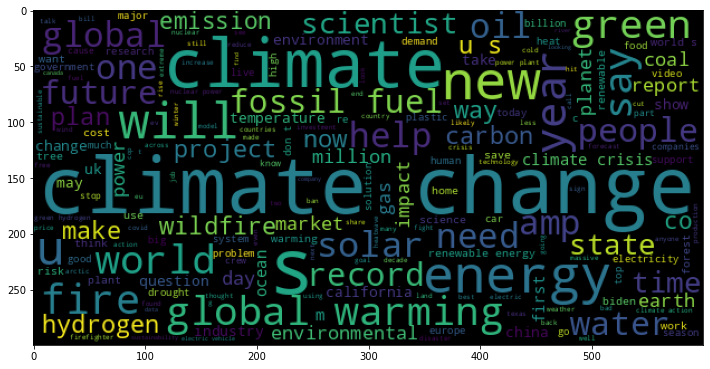

In [ ]:
plt.figure(figsize=(12,8))
wc = WordCloud(width=600,height=300).generate(' '.join(eng))
plt.imshow(wc)
plt.show();

In [ ]:
###word cloud for french words

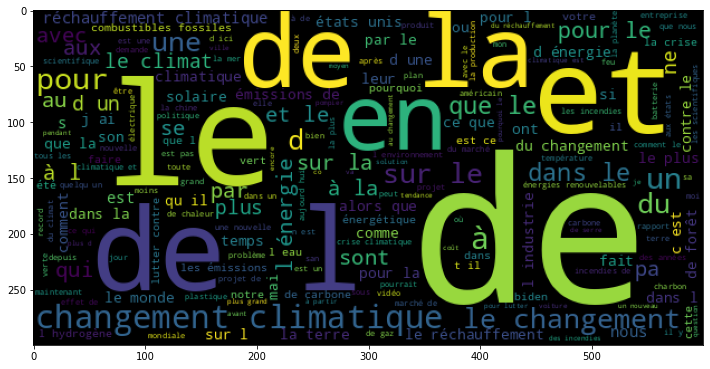

In [ ]:
plt.figure(figsize=(12,8))
wc = WordCloud(width=600,height=300).generate(' '.join(fra))
plt.imshow(wc)
plt.show();

In [ ]:
###Data distribution for both english and french words

In [ ]:
def word_count(line):
    return len(line.split())

new_df['eng_counts'] = new_df['eng'].apply(lambda x: word_count(x))
new_df['french_counts'] = new_df['french'].apply(lambda x: word_count(x))

<ipython-input-28-94846bb289dc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['eng_counts'],ax=axes[0])
<ipython-input-28-94846bb289dc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['french_counts'],ax=axes[1])


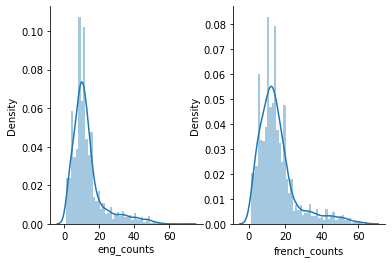

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.distplot(new_df['eng_counts'],ax=axes[0])
sns.distplot(new_df['french_counts'],ax=axes[1])
sns.despine()
plt.show();

In [ ]:
###Machine Learning using Hugging face and Tensorflow

Here the machine learning model for English to French translation using the Helsinki-NLP/opus-mt-en-fr pre-trained tokenizer and model is impelemented. The tokenizer and model are loaded using the AutoTokenizer and TFAutoModelForSeq2SeqLM classes from the transformers package in Python.

The data is prepared as input and output data by retrieving the English and French sentences from the new_df dataframe, which contains the data to be translated. The English and French inputs are stored in eng_inputs and french_inputs respectively.

The tokenizer is then used to tokenize both the input and output sequences. The return_tensors parameter specifies that the output should be returned as TensorFlow tensors. Padding is also applied to ensure that all sequences have the same length.

Finally, the tokenized input and output sequences are stored in input_ids and output_ids, which can be used as input to the machine learning model for training or inference.

In [72]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Trainer, TrainingArguments, TFAutoModelForSeq2SeqLM
from datasets import load_dataset, DatasetDict, Dataset
from transformers import AutoTokenizer
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [73]:
# Load the pre-trained tokenizer and model for English to French translation
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
model = TFAutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-fr")


from sklearn.model_selection import train_test_split


##prepare data
eng_inputs = [i for i in new_df["eng"].values]
french_inputs = [i for i in new_df["french"].values]

# Split the input and output sequences into training and testing sets
input_train, input_test, output_train, output_test = train_test_split(
    eng_inputs, french_inputs, test_size=0.2, random_state=42
)

# Tokenize the training and testing sets, and convert them to TensorFlow tensors
input_ids_train = tokenizer(input_train, return_tensors="tf", padding=True).input_ids
output_ids_train = tokenizer(output_train, return_tensors="tf", padding=True).input_ids
input_ids_test = tokenizer(input_test, return_tensors="tf", padding=True).input_ids
output_ids_test = tokenizer(output_test, return_tensors="tf", padding=True)


# # Tokenize the input and output sequences, and convert them to TensorFlow tensors
# input_ids = tokenizer(eng_inputs, return_tensors="tf", padding=True).input_ids
# output_ids = tokenizer(french_inputs, return_tensors="tf", padding=True).input_ids


/usr/local/lib/python3.9/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at Helsinki-NLP/opus-mt-en-fr.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


The NLP algorithm used in this code is a Sequence-to-Sequence (Seq2Seq) model. Specifically, the model used is TFAutoModelForSeq2SeqLM, which is a transformer-based Seq2Seq model implemented in TensorFlow. The purpose of the model is to perform English-to-French machine translation. The tokenizer used is AutoTokenizer, which is a tokenizer that automatically selects the appropriate tokenizer based on the model being used. In this case, it uses the tokenizer provided by the Helsinki-NLP/opus-mt-en-fr model.

In [74]:
###Translate model

In [75]:
def translate(text):
    # Tokenize the input texts and convert them to TensorFlow tensors
    input_ids = tokenizer.encode(text, return_tensors="tf")
    # Generate the output translations for the input texts
    outputs = model.generate(input_ids=input_ids, max_length=1000, early_stopping=True)
    # Decode the output translations and skip any special tokens
    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    ## Return decoded text
    return decoded

In [76]:
###test model

In [77]:
# text = "Renewable energy is the next big energy move?"
# translation = translate(text)
# print(translation)

In [78]:
! pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
# ! ngrok authtoken 2NHuLMzhR6zHAhrEeScdCanK5Qc_3gtDCisagLewao33wjjJh
# # ! ngrok http 8501

In [80]:
! pip install pyngrok
! pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
#from pyngrok import ngrok

In [82]:
# Define the Streamlit app
# Install required dependencies


# Create a new Python file with the app code
%%writefile app.py
import streamlit as st

def app():
    st.title("English to French Translation")
    text = st.text_input("Enter English text", "")
    if st.button("Translate"):
        with st.spinner("Translating..."):
            output = translate(text)
        st.success(f"French translation: {output}")
        
if __name__ == "__main__":
    app()

Writing app.py


In [83]:
! streamlit run app.py &>/dev/null&

In [84]:
! ngrok authtoken 2NHuLMzhR6zHAhrEeScdCanK5Qc_3gtDCisagLewao33wjjJh

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [85]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2023-03-20 21:13:55--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 52.202.168.65, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  15.4MB/s    in 0.9s    

2023-03-20 21:13:56 (15.4 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [86]:
! unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [87]:
get_ipython().system_raw('./ngrok http 8501 &')

In [99]:
# ! curl -s http://localhost:4040/api/tunnels | python3 -c \
#     "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [89]:
! streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://34.125.213.49:8502

  Stopping...
^C


In [90]:
# %%writefile app.py
# streamlit.title("hello world")

In [91]:
#! streamlit run app.py &>/dev/null&

In [92]:
#!ngrok authtoken 2NHuLMzhR6zHAhrEeScdCanK5Qc_3gtDCisagLewao33wjjJh

In [93]:
#!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [94]:
#!unzip ngrok-stable-linux-amd64.zip

In [95]:
#get_ipython().system_raw('./ngrok http 8501 &')

In [96]:
#! curl -s http://localhost:4040/api/tunnels | python3 -c \
   # "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [97]:
#!streamlit run /content/app.py